In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as lm
from sklearn.metrics import mean_squared_error, r2_score
import itertools

In [2]:
myData = pd.read_csv("https://hastie.su.domains/ElemStatLearn/datasets/prostate.data", sep='\t')
train_mask = (myData['train'] == 'T')
test_mask = (myData['train'] == 'F')
myData = myData.drop(columns=[myData.columns[0], myData.columns[10]])
X_train = myData[train_mask].iloc[:, :-1]
Y_train =  myData[train_mask].iloc[:, -1]
X_test = myData[test_mask].iloc[:, :-1]
Y_test =  myData[test_mask].iloc[:, -1]

In [8]:
model = lm()
model.fit(X_train, Y_train)
RSS = mean_squared_error(Y_test, model.predict(X_test)) * len(Y_test)

In [9]:
RSS

15.638220165228065

In [10]:
def bestsubset(X, Y):
    RSS_list, numb_features, feature_list = [], [], []

    for m in range(1,len(X.columns) + 1):
        best_RSS = np.inf
        
        # Loop over all possible combinations: from n choose m (where n is the number of columns)
        for combo in itertools.combinations(X.columns, m):
            tmp_X = X[list(combo)]
            tmp_model = lm()
            tmp_model.fit(tmp_X, Y)
            tmp_RSS = mean_squared_error(Y, tmp_model.predict(tmp_X)) * len(Y)
            
            if tmp_RSS < best_RSS:
                best_RSS = tmp_RSS
                best_varset = combo
        
        RSS_list.append(best_RSS)                  
        feature_list.append(best_varset)          
        numb_features.append(len(best_varset))   
            
    return pd.DataFrame({'msize': numb_features,
                       'RSS': RSS_list, 
                       'features':feature_list}) 

In [12]:
rs = bestsubset(X_train, Y_train)
rs

,msize,RSS,features
0,1,44.528583,"(lcavol,)"
1,2,37.091846,"(lcavol, lweight)"
2,3,34.907749,"(lcavol, lweight, svi)"
3,4,32.814995,"(lcavol, lweight, lbph, svi)"
4,5,32.069447,"(lcavol, lweight, lbph, svi, pgg45)"
5,6,30.539778,"(lcavol, lweight, lbph, svi, lcp, pgg45)"
6,7,29.437300,"(lcavol, lweight, age, lbph, svi, lcp, pgg45)"
7,8,29.426384,"(lcavol, lweight, age, lbph, svi, lcp, gleason..."


In [24]:
X_train_AIC = X_train[list(rs['features'].iloc[6])]
X_test_AIC = X_test[list(rs['features'].iloc[6])]
model = lm()
model.fit(X_train_AIC, Y_train)
RSS = mean_squared_error(Y_test, model.predict(X_test_AIC)) * len(Y_test)
RSS

15.495404626758045

In [25]:
X_train_BIC = X_train[list(rs['features'].iloc[1])]
X_test_BIC = X_test[list(rs['features'].iloc[1])]
model = lm()
model.fit(X_train_BIC, Y_train)
RSS = mean_squared_error(Y_test, model.predict(X_test_BIC)) * len(Y_test)
RSS

14.774470430415109

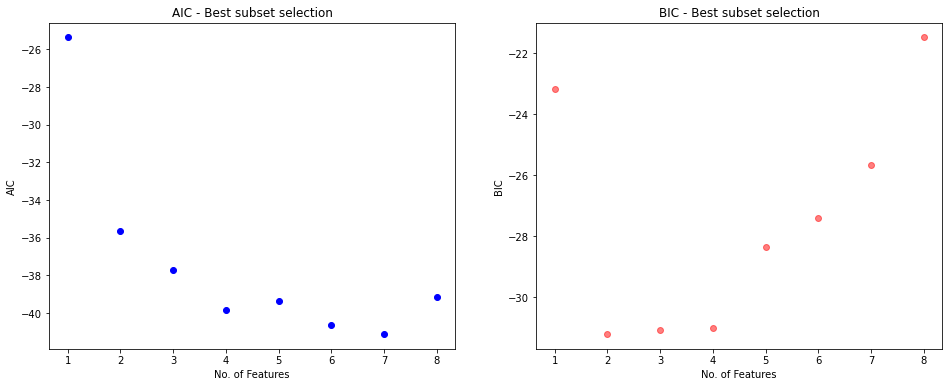

In [13]:
n = len(Y_train)
Aic = n*np.log(rs.RSS/n) + 2*rs.msize
Bic = n*np.log(rs.RSS/n) + rs.msize*np.log(n)

fig = plt.figure(figsize = (16,6))
ax = fig.add_subplot(1, 2, 1)

ax.scatter(rs.msize, Aic, alpha = 1, color = 'blue' )
ax.set_xlabel('No. of Features')
ax.set_ylabel('AIC')
ax.set_title('AIC - Best subset selection')


ax = fig.add_subplot(1, 2, 2)
ax.scatter(rs.msize, Bic, alpha = .5, color = 'red' )
ax.set_xlabel('No. of Features')
ax.set_ylabel('BIC')
ax.set_title('BIC - Best subset selection')

plt.show()